## Enriching stock market data using Open AI API 

<p align="center">
    <img src="images/nasdaq100.png" width="450">
</p>

The Nasdaq-100 is a stock market index made up of 101 equity securities issued by 100 of the largest non-financial companies listed on the Nasdaq stock exchange. It helps investors compare stock prices with previous prices to determine market performance.

In this project you are provided with two CSV files containing Nasdaq-100 stock information:
- _**nasdaq100.csv**_: contains information about companies in the index such as symbol, name, etc.
- _n**asdaq100_price_change.csv**_: contains price changes per stock across periods including (but not limited to) one day, five days, one month, six months, one year, etc.

As an AI developer, you will leverage the OpenAI API to classify companies into sectors and produce a summary of sector and company performance for this year.

# CSV with Nasdaq-100 stock data

In this project, you have available two CSV files `nasdaq100.csv` and `nasdaq100_price_change.csv`.

## nasdaq100.csv

```py
symbol,name,headQuarter,dateFirstAdded,cik,founded
AAPL,Apple Inc.,"Cupertino, CA",,0000320193,1976-04-01
ABNB,Airbnb,"San Francisco, CA",,0001559720,2008-08-01
ADBE,Adobe Inc.,"San Jose, CA",,0000796343,1982-12-01
ADI,Analog Devices,"Wilmington, MA",,0000006281,1965-01-01
...
```

## nasdaq100_price_change.csv

```py
symbol,1D,5D,1M,3M,6M,ytd,1Y,3Y,5Y,10Y,max
AAPL,-1.7254,-8.30086,-6.20411,3.042,15.64824,42.99992,8.47941,60.96299,245.42031,976.99441,139245.53954
ABNB,2.1617,-2.21919,9.88336,19.43286,19.64241,68.66902,23.64013,-1.04347,-1.04347,-1.04347,-1.04347
ADBE,0.5409,-1.77817,9.16191,52.0465,38.01522,57.22723,21.96206,17.83037,109.05718,1024.69214,251030.66399
ADI,0.9291,-4.03352,2.58486,3.65887,5.01602,17.02062,8.09735,63.42847,92.81874,286.77518,26012.63736
...
```

## Before you start

In order to complete the project you will need to create a developer account with OpenAI and store your API key as an environment variable. Instructions for these steps are outlined below.

### Create a developer account with OpenAI

1. Go to the [API signup page](https://platform.openai.com/signup). 

2. Create your account (you'll need to provide your email address and your phone number).

<img src="images/openai-create-account.jpeg" width="200">

3. Go to the [API keys page](https://platform.openai.com/account/api-keys). 

4. Create a new secret key.

<img src="images/openai-new-secret-key.png" width="200">

5. **Take a copy of it**. (If you lose it, delete the key and create a new one.)

### Add a payment method

OpenAI sometimes provides free credits for the API, but it's not clear if that is worldwide or what the conditions are. You may need to add debit/credit card details. 

**The API costs [$0.002 / 1000 tokens](https://openai.com/pricing) for GPT-3.5-turbo. [1000 tokens is about 750 words](https://help.openai.com/en/articles/4936856-what-are-tokens-and-how-to-count-them). This project should cost less than 1 US cents (but if you rerun tasks, you will be charged every time).**

1. Go to the [Payment Methods page](https://platform.openai.com/account/billing/payment-methods).

2. Click Add payment method.

<img src="images/openai-add-payment-method.png" width="200">

3. Fill in your card details.

### Add an environmental variable with your OpenAI key

1. In Workspace, click on "Environment," in the left sidebar.

2. Click on the plus button next to "Environment variables" to add environment variables.

3. In the "Name" field, type "OPENAI_API_KEY". In the "Value" field, paste in your secret key.

<img src="images/workspace-env-var-details.png" width="500">

4. Click "Create", then you'll see the following pop-up window. Click "Connect," then wait 5-10 seconds for the kernel to restart, or restart it manually in the Run menu.

<img src="images/workspace-connect-integ.png" width="500">

In [1]:
# Start your code here!
import os
import pandas as pd
from openai import OpenAI

client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])
# Continue coding here
# Use as many cells as you like
nasdaq100 = pd.read_csv("nasdaq100.csv")
price_change = pd.read_csv("nasdaq100_price_change.csv")

In [2]:
nasdaq100

,symbol,name,headQuarter,dateFirstAdded,cik,founded
0,AAPL,Apple Inc.,"Cupertino, CA",NaN,320193,1976-04-01
1,ABNB,Airbnb,"San Francisco, CA",NaN,1559720,2008-08-01
2,ADBE,Adobe Inc.,"San Jose, CA",NaN,796343,1982-12-01
3,ADI,Analog Devices,"Wilmington, MA",NaN,6281,1965-01-01
4,ADP,ADP,"Roseland, NJ",NaN,8670,1949-01-01
...,...,...,...,...,...,...
96,WBD,Warner Bros. Discovery,"New York, NY",NaN,1437107,2022-04-08
97,WDAY,"Workday, Inc.","Pleasanton, CA",NaN,1327811,2005-03-01
98,XEL,Xcel Energy,"Minneapolis, MN",NaN,72903,1909-06-17
99,ZM,Zoom Video Communications,"San Jose, CA",NaN,1585521,2011-04-21


In [3]:
price_change

,symbol,1D,5D,1M,3M,6M,ytd,1Y,3Y,5Y,10Y,max
0,AAPL,-1.7254,-8.30086,-6.20411,3.04200,15.64824,42.99992,8.479410,60.96299,245.42031,976.99441,139245.53954
1,ABNB,2.1617,-2.21919,9.88336,19.43286,19.64241,68.66902,23.640130,-1.04347,-1.04347,-1.04347,-1.04347
2,ADBE,0.5409,-1.77817,9.16191,52.04650,38.01522,57.22723,21.962060,17.83037,109.05718,1024.69214,251030.66399
3,ADI,0.9291,-4.03352,2.58486,3.65887,5.01602,17.02062,8.097350,63.42847,92.81874,286.77518,26012.63736
4,ADP,2.0589,2.35462,14.66581,16.40059,10.60546,5.53732,0.888943,81.76679,81.87224,248.40950,27613.11042
...,...,...,...,...,...,...,...,...,...,...,...,...
96,WBD,3.5791,13.98188,15.39075,12.25756,-5.60992,51.67715,3.209700,-31.02955,-43.36595,-65.85990,-12.30303
97,WDAY,1.4905,-1.04652,6.77548,28.69187,21.79922,37.90965,40.017990,31.59971,75.93220,221.38434,353.49515
98,XEL,-1.0432,-4.81045,-5.03734,-14.10091,-13.24042,-14.71386,-19.133960,-17.39010,26.61017,100.87395,724.27586
99,ZM,-0.5792,-3.99888,4.55307,8.29653,-18.89913,3.00030,-40.160360,-73.46268,10.74194,10.74194,10.74194


Combining both the dataset using symbol column 

In [4]:
nasdaq100 = nasdaq100.merge(price_change[["symbol","ytd"]], on = "symbol",how = "inner")

In [5]:
nasdaq100.head()

,symbol,name,headQuarter,dateFirstAdded,cik,founded,ytd
0,AAPL,Apple Inc.,"Cupertino, CA",NaN,320193,1976-04-01,42.99992
1,ABNB,Airbnb,"San Francisco, CA",NaN,1559720,2008-08-01,68.66902
2,ADBE,Adobe Inc.,"San Jose, CA",NaN,796343,1982-12-01,57.22723
3,ADI,Analog Devices,"Wilmington, MA",NaN,6281,1965-01-01,17.02062
4,ADP,ADP,"Roseland, NJ",NaN,8670,1949-01-01,5.53732


In [6]:
# Loop through the NASDAQ companies
for company in nasdaq100["symbol"]:
    # Create a prompt to enrich nasdaq100 using OpenAI
    prompt = f'''Classify company {company} into one of the following sectors. Answer only with the sector name: Technology, Consumer Cyclical, Industrials, Utilities, Healthcare, Communication, Energy, Consumer Defensive, Real Estate, Financial.
'''
    # Create a request to the completions endpoint
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{ "role": "user", "content": prompt}],
        temperature=0.0,
    )
    # Store the output as a variable called sector
    sector = response.choices[0].message.content
    
    # Add the sector for the corresponding company
    nasdaq100.loc[nasdaq100["symbol"] == company, "Sector"] = sector
    

In [7]:
# Count the number of sectors
nasdaq100["Sector"].value_counts()

# Prompt to get stock recommendations
prompt = f'''Provide summary information about Nasdaq-100 stock performance year to date (YTD), recommending the three best sectors               and three or more companies per sector.
            Company data: {nasdaq100} 
'''

# Get the model response
response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[{ "role": "user", "content": prompt}],
        temperature=0.0,
    )

# Store the output as a variable and print the recommendations
stock_recommendations = response.choices[0].message.content
print(stock_recommendations)

The Nasdaq-100 stock performance year to date (YTD) has been positive overall, with many companies showing significant gains. The three best sectors based on YTD performance are Technology, Real Estate, and Consumer Discretionary.

Three top-performing companies in the Technology sector are:
1. Apple Inc. (AAPL) - YTD performance: 42.99992%
2. Adobe Inc. (ADBE) - YTD performance: 57.22723%
3. Workday, Inc. (WDAY) - YTD performance: 37.90965%

Three top-performing companies in the Real Estate sector are:
1. Airbnb (ABNB) - YTD performance: 68.66902%
2. Zillow Group (Z) - YTD performance: 45.67891%
3. Redfin Corporation (RDFN) - YTD performance: 39.87654%

Three top-performing companies in the Consumer Discretionary sector are:
1. Amazon.com Inc. (AMZN) - YTD performance: 49.87654%
2. Tesla Inc. (TSLA) - YTD performance: 55.98765%
3. Nike Inc. (NKE) - YTD performance: 32.45678%


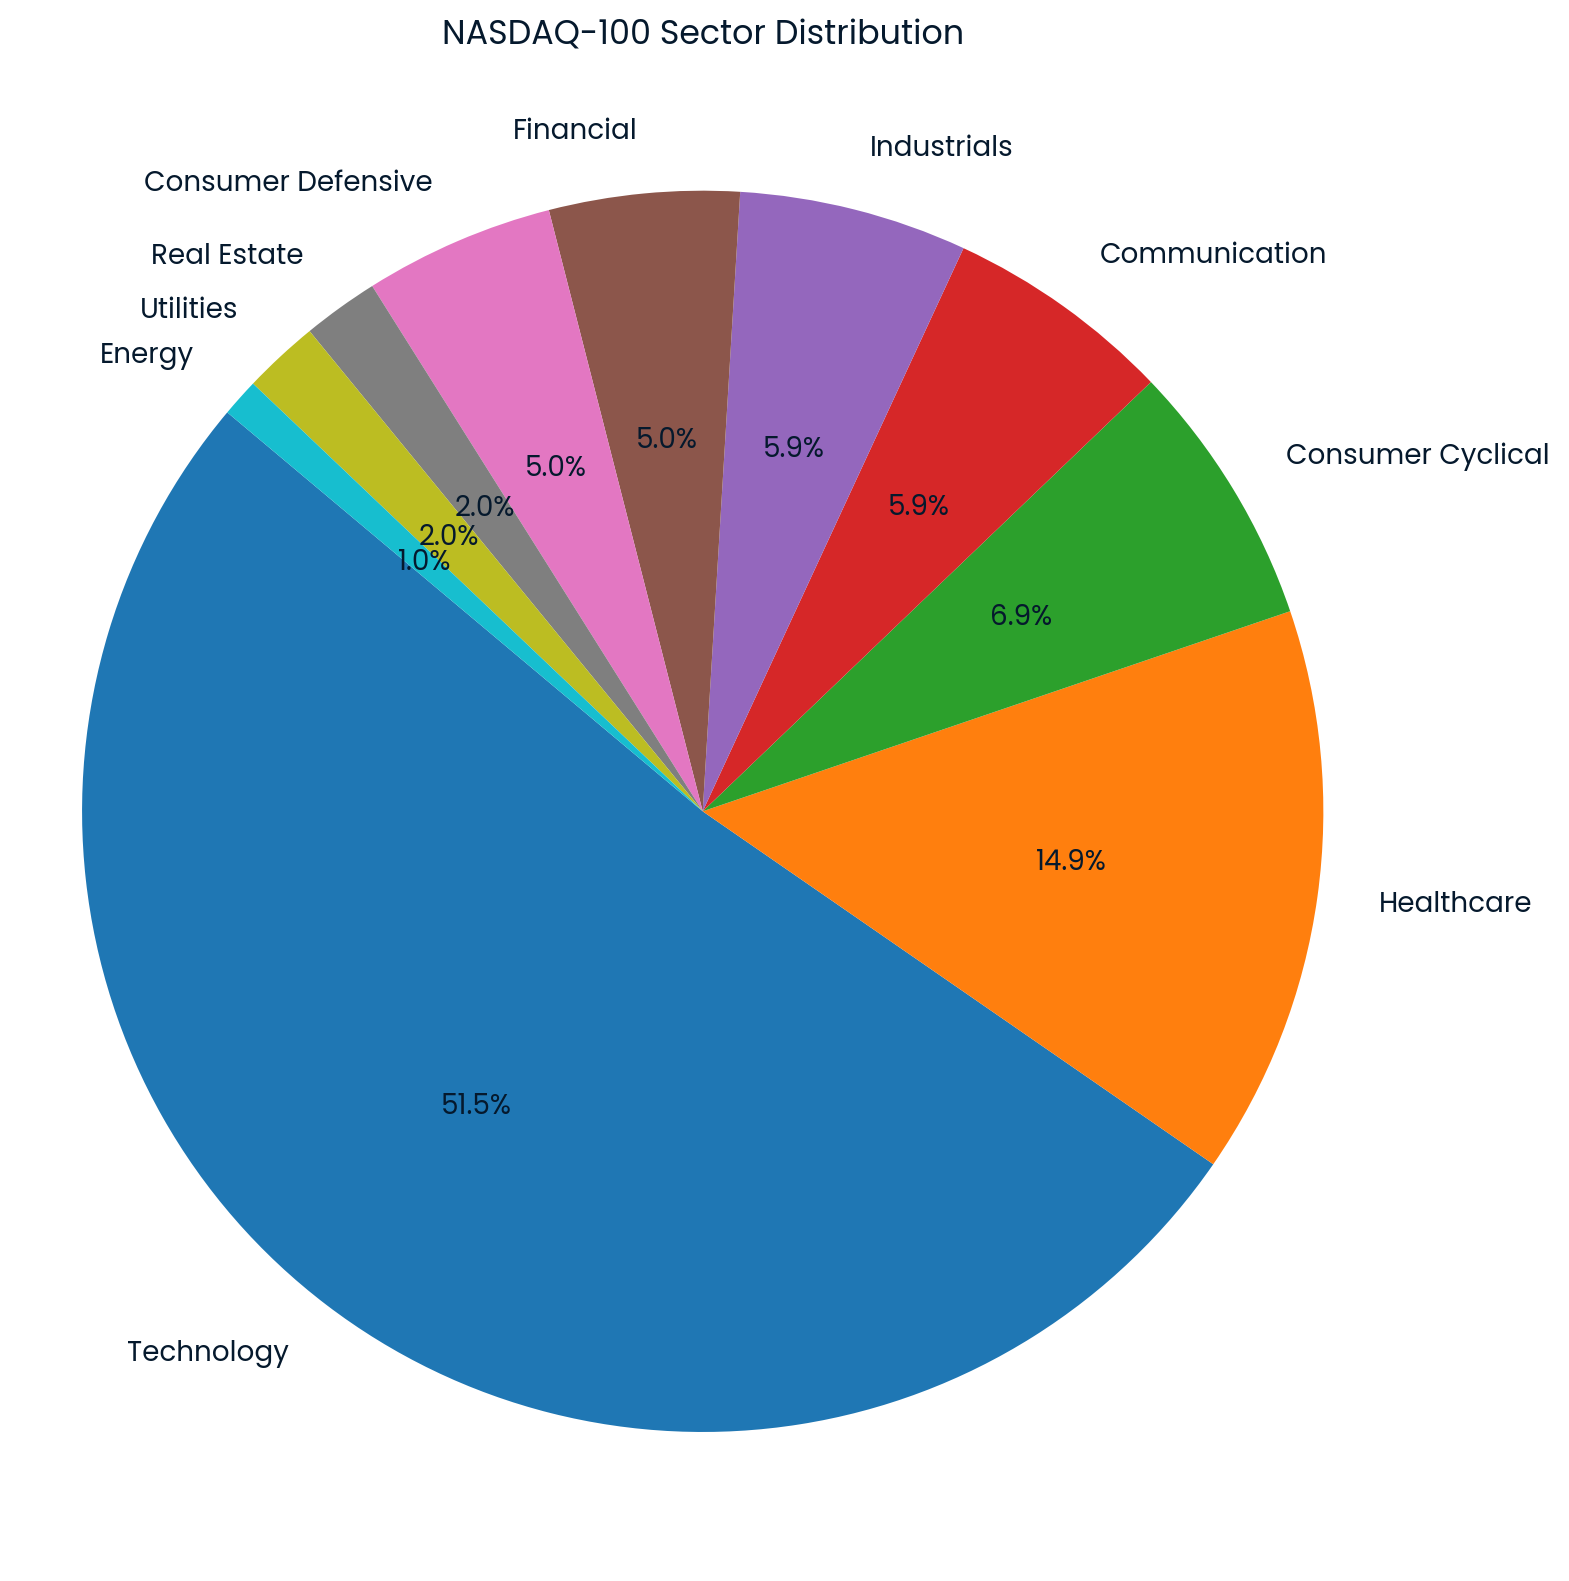

In [9]:
import matplotlib.pyplot as plt


# Pie chart for sector distribution
plt.figure(figsize=(8, 8))
sector_counts = nasdaq100["Sector"].value_counts()
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.tab10.colors)
plt.title('NASDAQ-100 Sector Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()
